# Análise Exploratória de Dados de Vendas Online
## Por: Kenzo, Maurício Terreo,  e  Vinícius Leôncio
### Módulo: Técnicas de Programação I
---

O objetivo deste projeto é proporcionar a oportunidade de aplicar os conhecimentos adquiridos ao longo da disciplina de Técnicas de Programação 1 em um contexto prático, relevante e data-driven. Com uma análise exploratória de dados de vendas online, utilizando um conjunto de dados real, a fim de extrair insights e entender melhor a base de dados.

Base de dados usada: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv

Foi explorado o seguinte dataset nesse arquivo: 
- olist_order_payments_dataset.csv

---


## Dataset olist_order_payments_dataset

### Leitura dos Dados

In [2]:
import pandas as pd


df_payments = pd.read_csv('Brazilian E-Commerce Public Dataset/olist_order_payments_dataset.csv')
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


### Análise Exploratoria Inicial dos Dados

In [2]:
# Quantidade de registros
df_payments.shape[0]

103886

In [3]:
# Nomes e Tipos de Dados das Colunas
df_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [4]:
# Dados Faltantes
df_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [5]:
df_payments['payment_type'].value_counts(normalize=True)

payment_type
credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
not_defined    0.000029
Name: proportion, dtype: float64

<Axes: xlabel='payment_sequential'>

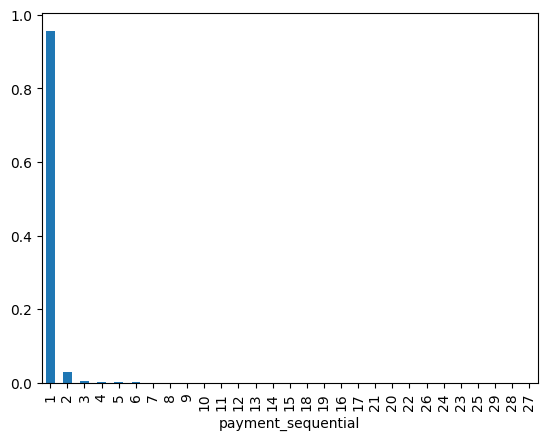

In [6]:
#  Proporção Para Cada Valor no Data Frame
df_payments['payment_sequential'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='payment_type'>

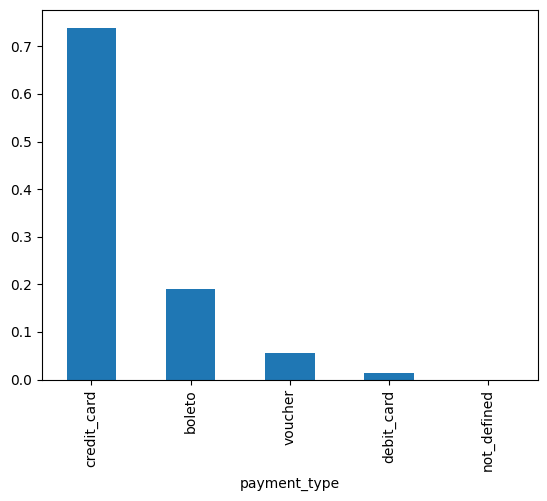

In [7]:
df_payments['payment_type'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='payment_installments'>

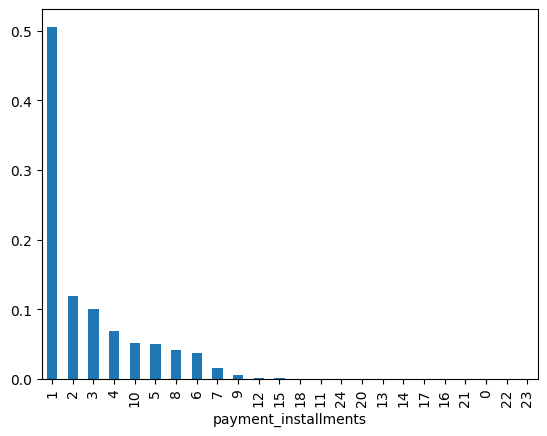

In [8]:
df_payments['payment_installments'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='payment_value'>

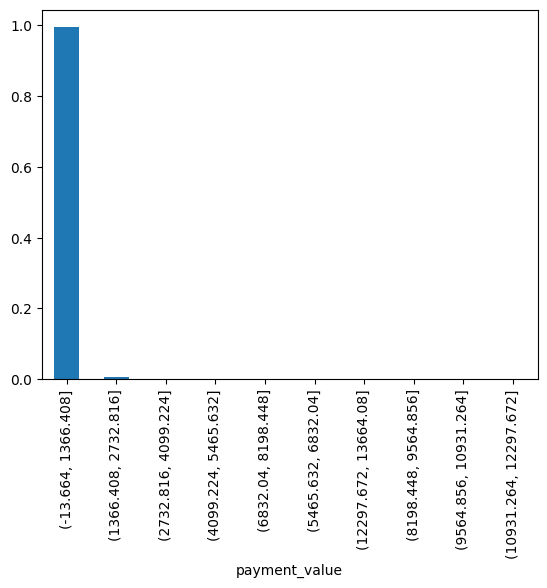

In [9]:
# Pela quantidade de valores diferentes em 'payment_value', foi conviniente a criação de intervalos para os valores da coluna
bins = pd.cut(df_payments['payment_value'], bins=10)
bins.value_counts(normalize=True).plot(kind='bar')

In [10]:
# Algumas Medidas Estatísticas
df_payments.describe().round(2)

,payment_sequential,payment_installments,payment_value
count,103886.00,103886.00,103886.00
mean,1.09,2.85,154.10
std,0.71,2.69,217.49
min,1.00,0.00,0.00
25%,1.00,1.00,56.79
50%,1.00,1.00,100.00
75%,1.00,4.00,171.84
max,29.00,24.00,13664.08


### Questionamentos a Respeito dos Dados

1. Quantos pagamentos foram feitos no cartão de crédito a vista, ou seja, no crédito com apenas uma parcela?

In [23]:
credito_avista = df_payments[(df_payments['payment_installments'] == 1) & (df_payments['payment_type'] == 'credit_card')]
qtd_credito_avista = credito_avista.shape[0]
pag_total = df_payments.shape[0]

print(f'O total de compras feitos no cartão de crédito a vista foi de {qtd_credito_avista:,}')
print(f'Isso representa {qtd_credito_avista / pag_total * 100:.2f}% de todos os pagamentos')

O total de compras feitos no cartão de crédito a vista foi de 25,455
Isso representa 24.50% de todos os pagamentos


2. Há pagamentos na tabela que NÃO sejam em cartão de crédito que foram parcelados?

In [4]:
parcelados = df_payments[(df_payments['payment_installments'] != 1) & (df_payments['payment_type'] != 'credit_card')]

print(f'Pagamentos parcelados realizados sem o cartão de crédito: {parcelados.shape[0]}')

Pagamentos parcelados realizados sem o cartão de crédito: 0


3. Qual o valor médio das compras para cada tipo de meio de pagamento?

In [13]:
media_pag = df_payments[['payment_type', 'payment_value']].groupby('payment_type').mean().round(2)
media_pag.rename(columns={'payment_value' : 'payment_mean'}, inplace=True)
media_pag.sort_values(by='payment_mean', ascending=False)

,payment_mean
payment_type,
credit_card,163.32
boleto,145.03
debit_card,142.57
voucher,65.70
not_defined,0.00


### Adição de novas colunas ao dataframe

In [13]:
# Coluna que indica se o pagamento foi a vista ou não(boleano)
df_payments['cash_payment'] = df_payments['payment_installments'] == 1

# Coluna com o pagamento normalizado em relação a soma de todos os pagamentos realizados na mesma compra
df_payments['pagamento_normalizado'] = (df_payments['payment_value'] / df_payments.groupby('order_id')['payment_value'].transform('sum')) * 100

df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value,cash_payment,pagamento_normalizado
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,False,100.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,True,100.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,True,100.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,False,100.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,False,100.0
...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,True,100.0
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,False,100.0
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,True,100.0
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,False,100.0
